# **Introduction**:

This notebook delves into the realm of **customer sentiment within the [women's e-commerce clothing](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews) industry**. By analyzing a real-world dataset of customer reviews, we aim to gain insights into product performance and uncover valuable clues about what drives customer satisfaction. Specifically, we will address the key business questions like:

- Which product categories receive the highest and lowest ratings?
- What are the most common words used in positive and negative reviews?
- Can we identify keywords associated with different sentiment categories?
- Is there a relationship between review length and helpfulness votes? Do longer reviews garner more support?

By extracting meaningful patterns and trends from the data, this analysis strives to provide actionable recommendations to enhance customer experience, improve product quality, and drive business success.

# 1. **Import and Explore data**

In [1]:
# import manipulation packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import visualizing packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Enhance showing
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df= pd.read_csv('/kaggle/input/Womens Clothing E-Commerce Reviews.csv')

# show first rows
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


* Some features description:
    - **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
    - **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.

for other features, you can check the dataset link above.

In [3]:
# show feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


* Our data frame has 23486 raws and 10 features.
* we have 5 numeric features and may need to convert some object features to Category type to save memory and make our process faster.
* The **clothing ID** feature is just a clothes index. Therefore, it's better to use a string type to be more meaningful in our analysis.
* some features in our dataset have Nulls.

In [4]:
# Generate a comprehensive descriptive summary for both numeric and non-numeric features:
print("\n- Numeric features descriptive summary:")
display(df.describe())

print("\n- Non-numeric features descriptive summary:")
display(df.describe(exclude='number'))



- Numeric features descriptive summary:


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000



- Non-numeric features descriptive summary:


,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,General,Tops,Dresses
freq,136,3,13850,10468,6319


* Do you believe that?! The age feature has 99-year-old reviewers! we need to check this.
* We need to check outliers in both Age and Positive Feedback Count features.
* In Review Text, we have a review repeated 3 times! That may indicate we have duplicates in our dataset.
* All Non-numeric features have Nulls.


In [5]:
# Show unique elements in each categorical feature
for col in ['Division Name', 'Department Name', 'Class Name']:
    print(f"- Unique values in {col}:- \n", df[col].unique().tolist(), "\n")

- Unique values in Division Name:- 
 ['Initmates', 'General', 'General Petite', nan] 

- Unique values in Department Name:- 
 ['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan] 

- Unique values in Class Name:- 
 ['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear', 'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets', 'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering', 'Casual bottoms', nan, 'Chemises'] 



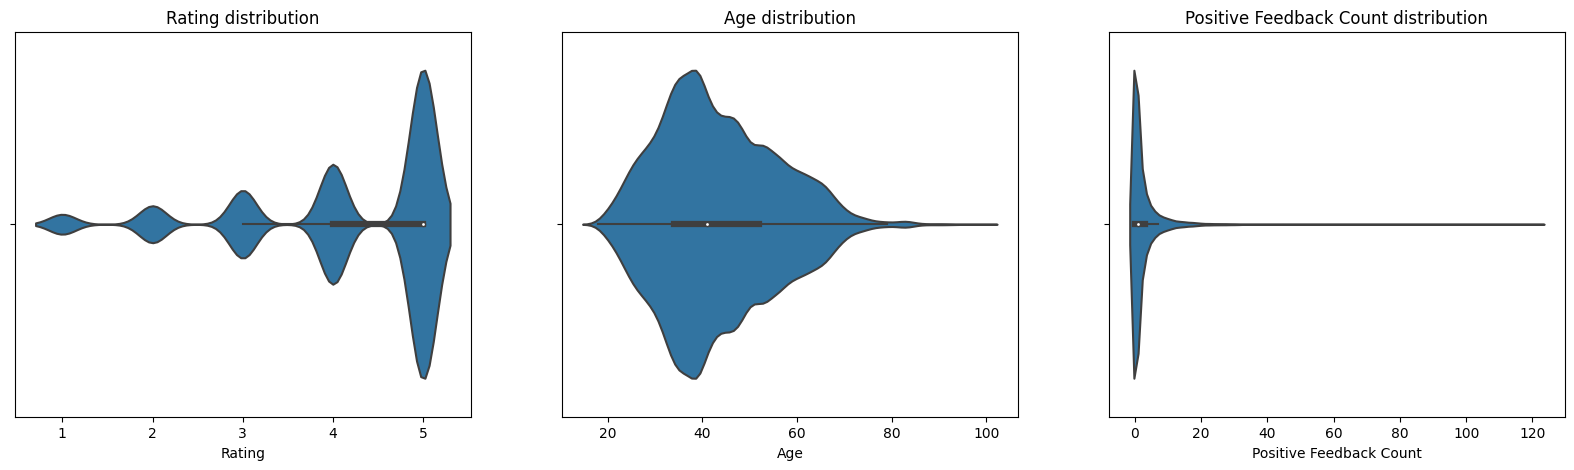

In [6]:
# Plot the distribution
cols = ["Rating", "Age", "Positive Feedback Count"]
fig, ax1 = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(cols):
    sns.violinplot(data=df, x=col, ax=ax1[i])
    ax1[i].set_title(f"{col} distribution")

plt.show()

* From our quick look we found that **Rating** feature has a left-skewed and we have just one review in every 1,3 and 5 ratings which more than 100 people are agreeing with! We must see these reviews in the sentiment step.

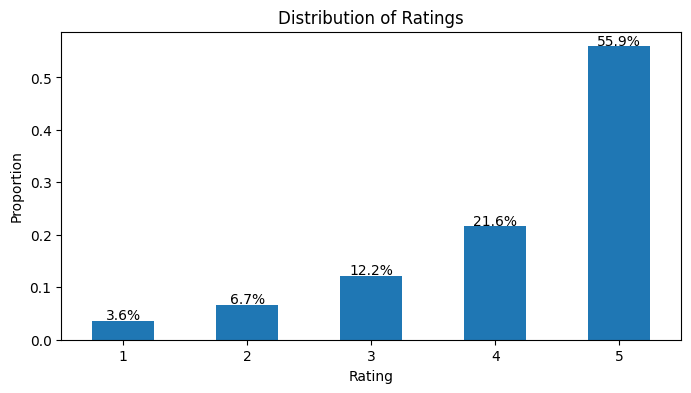

In [7]:
# Calculate rating counts and normalize
rating_counts = df['Rating'].value_counts(normalize=True).sort_index()

# Create a bar chart with annotations
plt.figure(figsize=(8, 4))
rating_counts.plot(kind='bar', title="Distribution of Ratings", ylabel="Proportion", rot=0)
for i, count in rating_counts.items():
    # set text position
    h= i-1
    v= count+0.01
    plt.text(h, v, f"{count:0.1%}", ha= 'center', va= 'center')
# Display the plot
plt.show()

* in the above plot we see that our data has 55.4% 5 stars and 21.7% 4 stars. That means that most reviews have positive polarity. It's imbalanced dataset.

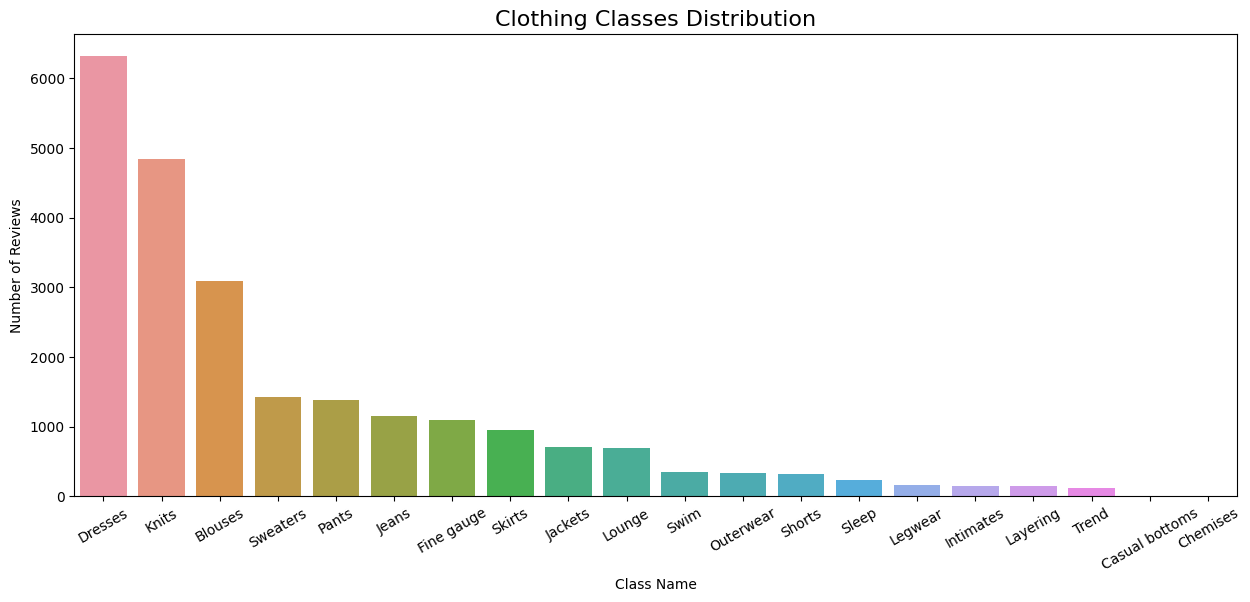

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4612,4612,54,27,NaN,NaN,5,1,0,General,Bottoms,Casual bottoms
12397,12397,45,26,"Cute pants, but short.","These pants have a really cute design. however, they are a bit short (and i'm only 5'4""). i'm still happy i purchased them, but i thought i was purchasing full length pants (as shown on the model) and not capris.",4,1,0,General,Bottoms,Casual bottoms
13430,13430,10,38,Comfy and cute,"This dress is comfortable and a great piece to travel with. goes with ballet flats, sandals, to ankle boots.",4,1,0,Initmates,Intimate,Chemises


In [8]:
# Plot clothing classes distribution
plt.figure(figsize=(15,6))
sns.countplot(x=df['Class Name'],
    order=df['Class Name'].value_counts().index)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.ylabel("Number of Reviews")
plt.title("Clothing Classes Distribution", size=16)
plt.show()

# Select Casual bottoms and Chemises rows
filtered_df = df[df['Class Name'].isin(['Casual bottoms', 'Chemises'])]
display(filtered_df)  # Alternatively, print(filtered_df) for console output

# Move elements to correct classes (using indexing for readability)
df.loc[(df['Class Name'] == 'Casual bottoms'), 'Class Name'] = 'Pants'
df.loc[df['Class Name'] == 'Chemises', 'Class Name'] = 'Dresses'

* We observed that there were two classes each containing a single element. Upon closer inspection, we discovered that these elements belonged to the pants and dresses classes. Therefore, we will move them to their respective correct classes.

# 2. **Data cleaning**

## 2.1 Check missing values 

In [9]:
# Compute percentage of missing values
nulls_df = np.round(df.isna().sum() / df.shape[0] * 100, 2)

# Show only features with missing values
filter_df = nulls_df[nulls_df > 0].to_frame(name='nulls_percent')

filter_df

,nulls_percent
Title,16.22
Review Text,3.60
Division Name,0.06
Department Name,0.06
Class Name,0.06


* **Title** has missing values equal to 16% of all data But, we will not use these columns in our trip. Therefore, we will drop it.
* Other features have missing values lower than 5%. Therefore, we will drop these rows.

In [10]:
# drop missing values
df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], inplace= True)

In [11]:
# compute percentage of missing values
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

## 2.2 Check duplicates

* We previously saw that the "Review Text" column contains a review with freq =3. I checked all reviews and found that there is only one raw repeated.

In [12]:
# To see all duplicates in the Review Text column 
# df[df['Review Text'].duplicated()]

# Show all duplicates rows
df[df.duplicated(keep= False)]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [13]:
# drop duplicated rows.
df.drop_duplicates(keep= 'first', inplace= True)

# check duplicates after dropping.
print(f"- There are {df.duplicated().sum()} duplicated rows.")

- There are 0 duplicated rows.


## 2.3 Drop & change features types

- We also bin the Age column in a new feature to use in our analysis.

In [14]:
# Define life cycle categories and age ranges
life_cycle = ["0-18", "19-24", "25-30", "31-36", "37-45", "46-55", "+55"]
ages = [0, 18, 24, 30, 36, 45, 55, np.inf]

# Create the 'AgeBin' column using pd.cut
df["AgeBin"] = pd.cut(df["Age"], labels=life_cycle, bins=ages)

# Display a sample of the 'Age' and 'AgeBin' columns
print(df[["Age", "AgeBin"]].sample(5))

       Age AgeBin
102     69    +55
12330   37  37-45
8868    34  31-36
4543    36  31-36
7328    39  37-45


In [15]:
# drop redundant features.
df.drop(['Unnamed: 0', 'Title', "Age"], axis=1, inplace= True)
# change the Clothing ID columns to string type.
df["Clothing ID"]= df["Clothing ID"].astype('object')

# change the following columns to category type.
for col in ['Division Name', 'Department Name', 'Class Name']:
    df[col]= df[col].astype('category')

# check columns types
df.dtypes

Clothing ID                  object
Review Text                  object
Rating                        int64
Recommended IND               int64
Positive Feedback Count       int64
Division Name              category
Department Name            category
Class Name                 category
AgeBin                     category
dtype: object

## 2.4 Check outliers

In [16]:
cols= ["Rating", "Positive Feedback Count"]
for col in cols:
    # Compute first, third quantiles, and inter quantile range
    q_25= df[col].quantile(0.25)
    q_75= df[col].quantile(0.75)
    IQR= q_75 - q_25
    # compute upper and lower thresholds
    upper= q_75 + 1.5* IQR
    lower= q_25 - 1.5* IQR
    # Identify and count outliers for each column
    outliers_count= df[(df[col]> upper) | (df[col]< lower)][col].nunique()
    print(f"- Number of outlier values in {col} feature: {outliers_count}.\n")

- Number of outlier values in Rating feature: 2.

- Number of outlier values in Positive Feedback Count feature: 74.



# 3. **Visualizing and exploring patterns**

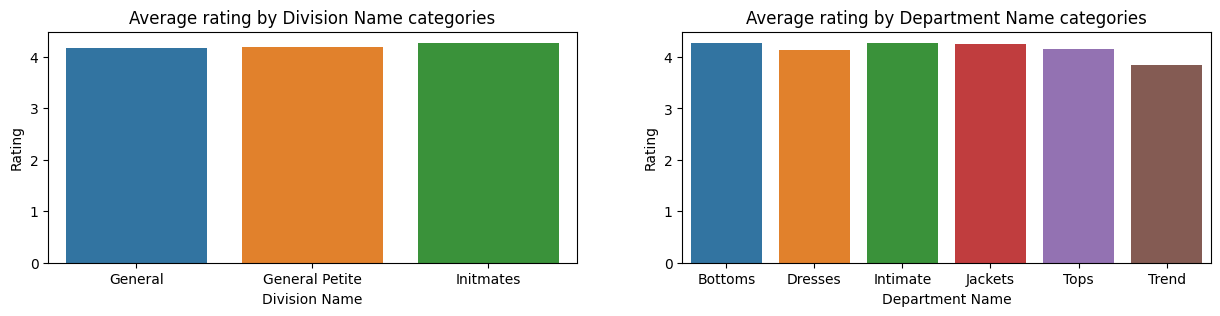

In [17]:
# show store structure 
plt.figure(figsize=(15,3))
for i, col in enumerate(['Division Name', 'Department Name'], 1):
    plt.subplot(1,2,i)
    sns.barplot(data= df, x= col, y= "Rating", ci= False)
    plt.title(f"Average rating by {col} categories")
plt.show()

## questions to answer:
- **show most positive count reviews.**

Positive Feedback Count          
                         count      mean
Rating                                  
1                          821  3.548112
2                         1549  3.360232
3                         2823  3.198725
4                         4908  2.488386
5                        12527  2.410074

Text(0, 0.5, '# of review supporters')

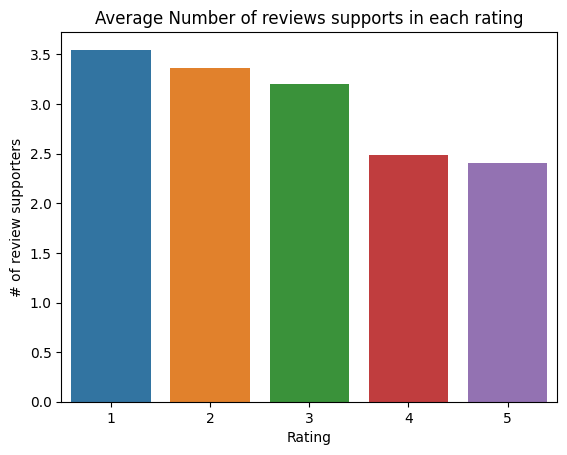

In [18]:
# Compute the relationship between Rating and Positive Feedback Count
display(df.groupby("Rating").agg({"Positive Feedback Count": ['count', 'mean']}))

# plot average Positive Feedback Count per rating
sns.barplot(data= df, y= "Positive Feedback Count", x="Rating", ci= None)
# set a title
plt.title("Average Number of reviews supports in each rating")
plt.ylabel("# of review supporters")

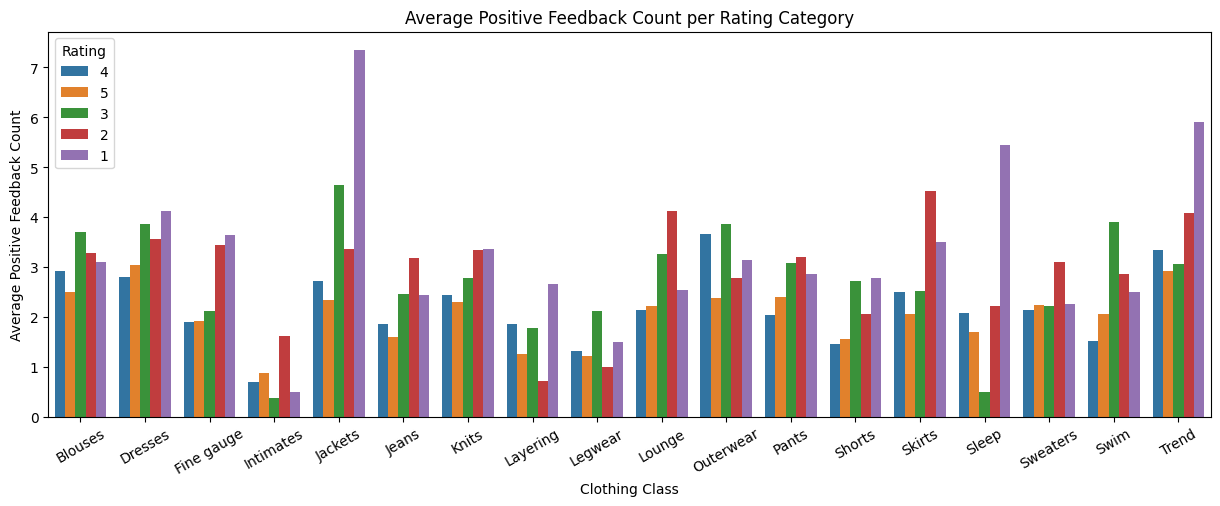

In [19]:
# plot average Positive Feedback Count per rating
Feedback_counts= df[["Class Name", "Positive Feedback Count", "Rating"]]
Feedback_counts["Rating"]= Feedback_counts["Rating"].astype(str)
# Create the barplot using explicit parameters for clarity
plt.figure(figsize= (15, 5))
sns.barplot(data= Feedback_counts, y= "Positive Feedback Count",x="Class Name"
            , hue="Rating", ci= None)
# Set a title
plt.title("Average Positive Feedback Count per Rating Category")
# Label axes
plt.xlabel("Clothing Class")
plt.ylabel("Average Positive Feedback Count")
# Rotate x-axis labels
plt.xticks(rotation=30)
# Show the plot
plt.show()

* In the above graph, we observe that the "Jackets," "Sleep," "Trend," and "Skirts" clothing classes have a significantly higher number of supporters for negative reviews compared to positive reviews.

Recommended IND          
                 count      mean
Rating                          
1                  821  0.018270
2                 1549  0.060684
3                 2823  0.414453
4                 4908  0.966585
5                12527  0.998164

Text(0.5, 1.0, 'average Recommended IND by rating')

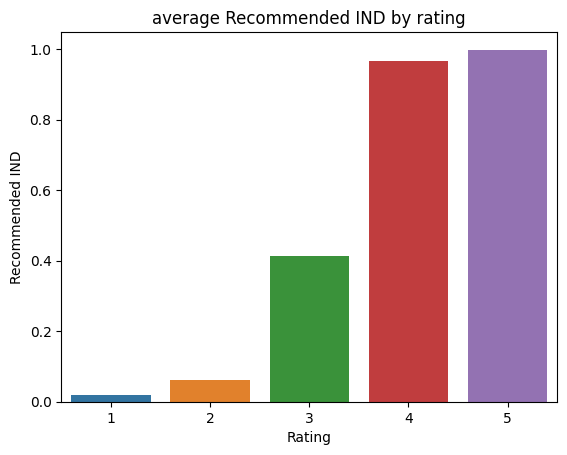

In [20]:
# Compute the relationship between Rating and Recommended IND
display(df.groupby("Rating").agg({"Recommended IND": ['count', 'mean']}))

# plot average Recommended IND per rating
sns.barplot(data= df, y= "Recommended IND", x="Rating", ci= None)
# set a title
plt.title("average Recommended IND by rating")

* **What is the average age of reviewers? How does age relate to rating or sentiment?**

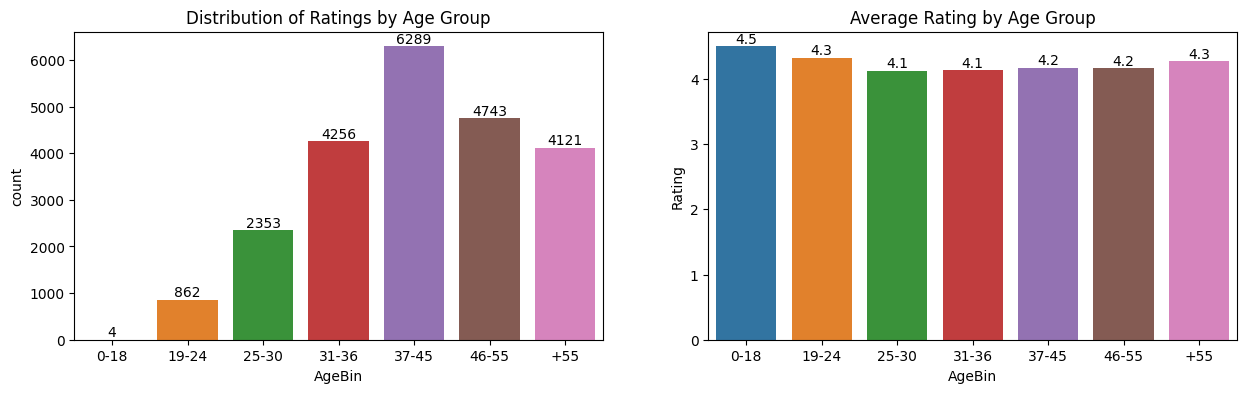

In [21]:
# Visualize the relationship between rating and age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Distribution of ratings by age group
ax1.set_title("Distribution of Ratings by Age Group")
sns.countplot(data=df, x="AgeBin", ax=ax1)
ax1.bar_label(ax1.containers[0])  # Label the single series bar directly

# Average rating by age group
ax2.set_title("Average Rating by Age Group")
sns.barplot(data=df, x="AgeBin", y="Rating", ci=None, ax=ax2)
ax2.bar_label(ax2.containers[0], fmt="{:0.1f}")  # Label the single series bar directly

plt.show()

- **Let's see reviewers' interest across all classes.**
- show reviewers' age distribution in rating and which class has the highest rating.

Text(0.5, 1.0, 'Average Age groups Rating in wear calsses')

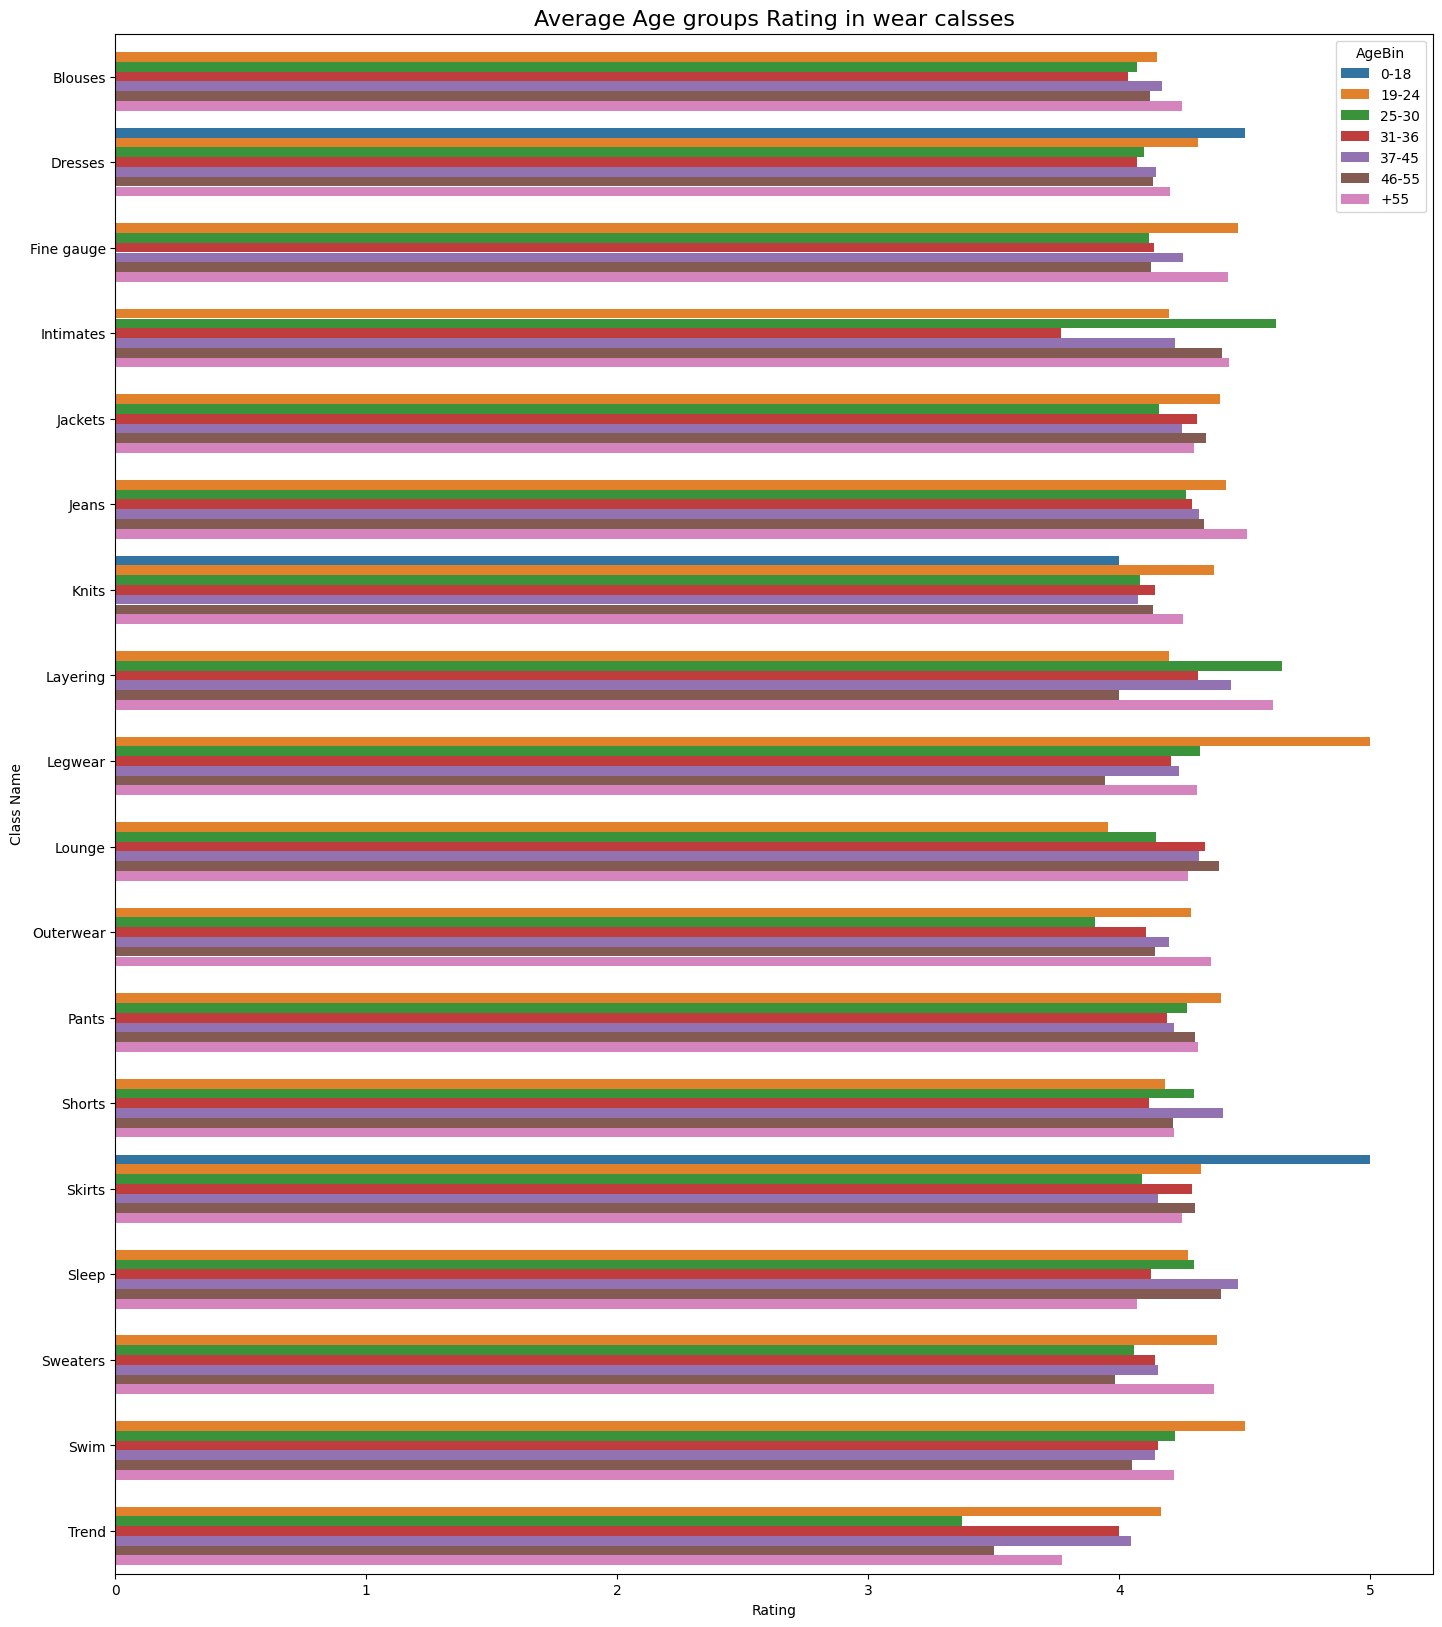

In [22]:
# Plot Average Age groups Rating in wear calsses
plt.figure(figsize= (17, 20))
sns.barplot(data= df, y= "Class Name", x= "Rating", hue= "AgeBin", ci= None)
plt.title("Average Age groups Rating in wear calsses", size= 16)

* **show the highest rating products in each class. and lowest also.**

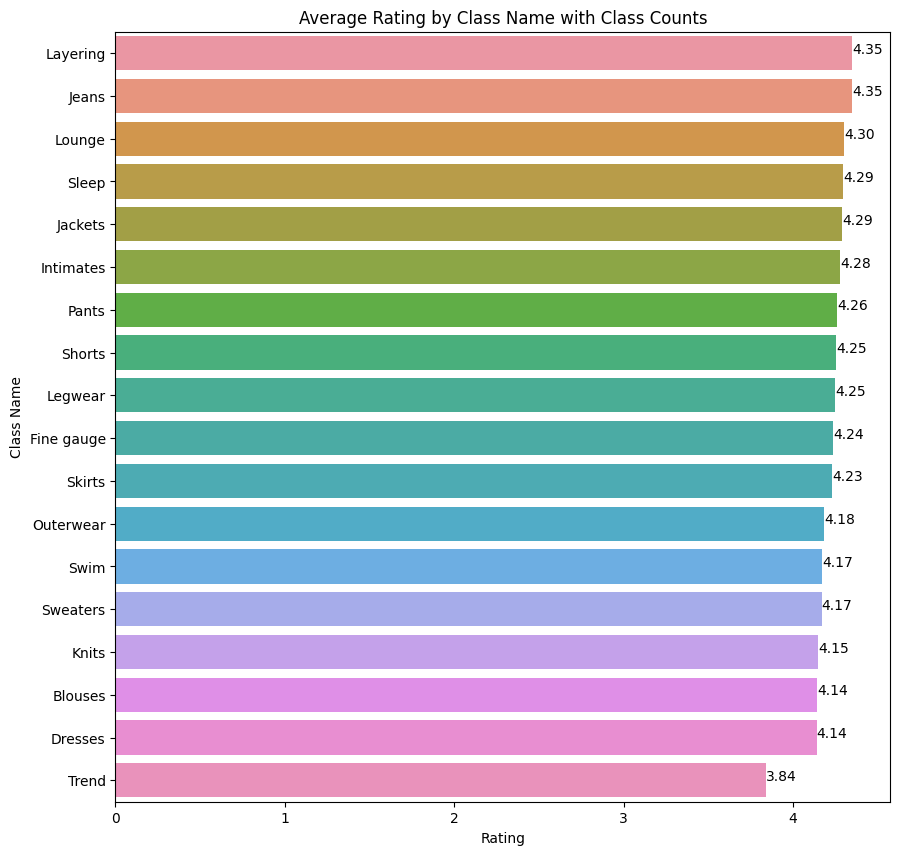

In [23]:
# Calculate class means and sort
class_means= df.groupby("Class Name")["Rating"].mean().sort_values(ascending= False)

# Create a bar chart
plt.figure(figsize=(10, 10))
sns.barplot(data= df, x="Rating", y="Class Name", order= class_means.index, ci= False)
plt.title("Average Rating by Class Name with Class Counts")
# plot a bar chart
for i, count in enumerate(class_means.items()):
    plt.text(count[1], i, f"{count[1]:0.2f}")

* Layering, Jeans, Lounge, Sleep, and Jackets classes have the top average rating(more than 4.3) And Trends has the lowest rating(less than 4).

In [24]:
# Calculate average rating per clothing ID and Classify products based on average rating 
summary_df= df.groupby('Clothing ID')['Rating'].mean()
good_product_ids= summary_df[summary_df >3].index.tolist()
normal_product_ids= summary_df[summary_df ==3].index.tolist()
bad_product_ids= summary_df[summary_df <3].index.tolist()

# Create a summary DataFrame with product counts
summary= df[["Class Name"]]
summary['good_products_count']= df['Clothing ID'].apply(lambda x: x if x in good_product_ids else np.nan)
summary['normal_products_count']= df['Clothing ID'].apply(lambda x: x if x in normal_product_ids else np.nan) 
summary['bad_products_count']= df['Clothing ID'].apply(lambda x: x if x in bad_product_ids else np.nan) 

# Count products in each class and transpose
summary= summary.groupby("Class Name").nunique()
# visualise the table
print("- products classification count:\n")
display(pd.DataFrame(summary.sum(),columns= ["Total"]))
# Print product classification by customer rating with green gradient styling
print("- products classification by customer rating:\n")
display(summary.T.style.background_gradient(cmap= "Greens"))

- products classification count:



,Total
good_products_count,1016
normal_products_count,89
bad_products_count,68


- products classification by customer rating:



Class Name,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
good_products_count,40,61,31,87,29,19,42,43,44,186,24,48,71,33,69,34,123,32
normal_products_count,0,1,2,10,2,2,3,2,1,22,0,2,10,0,10,2,18,2
bad_products_count,0,2,1,8,2,3,1,3,3,11,1,1,4,2,7,1,14,4


* After analyzing we can say that the store have 1016 good products, 89 normal products which need a few observations and issues must solve, and 68 pad products which must remove them from our store.

* **What are the most common words used in positive and negative reviews? Can you identify keywords associated with different sentiments?**

# **4. Sentiment analysis**

In [25]:
# import necessary packages
from wordcloud import WordCloud # Plot words frequency
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# define my stop words list
my_stopwords= ENGLISH_STOP_WORDS
# set a seed
SEED= 616

In [26]:
# Create a function compute average word length in each review
def avg_len(review):
    """
    Create a function compute average word length in each review.
    Input:
        review: a paragraph of words
    output:
        int: average word length
    """
    # split the review into a list of words
    words= review.strip().split()
    # compute word length
    word_len= [len(word) for word in words]
    # output average length
    return np.round(np.mean(word_len), 1)

In [27]:
def plot_words(text, title, color= "black"):
    """
    function to plot the most  frequently words in 
    input:
    text (str): the text contains words
    title (str): the plot title
    color (str): background plot color
    """
    plt.figure(figsize=(12, 10))
    cloud= WordCloud(random_state= SEED, background_color= color, 
                     stopwords= my_stopwords.union(["love", "like", "dress", "look", "top", "fit"]), 
                         width=1500, height=600).generate(text)
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most frequent words in {title} reviews", size= 16)
    plt.show()
    print("-"*50)

- **Before**  we dive deep into analysis steps, we will create a new feature called **positive** which we summarize different rating values into 3 categories: positive( 1 for rating 3,4 and 5) and negative(-1 for rating 1 and 2).
- We also concern only with the two features: Review Text and positive. Therefor, we will work on a dataframe contain these features.  

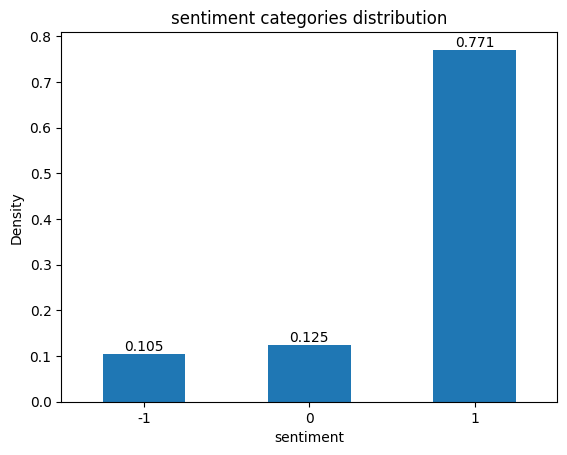

In [28]:
# Create the positive feature
df['sentiment']= df['Rating'].apply(lambda x: 1 if x in [4, 5] else -1 if x in [1, 2] else 0)

# Take important features in a new dataframe
sent_df= df[["Review Text", "sentiment"]]
# compute positive distribution
pos_dist= sent_df.sentiment.value_counts(normalize= True).sort_index()
# plot positive categories dist
pos_dist.plot(kind= "bar", rot= 0, title= "sentiment categories distribution", ylabel= "Density")

# show labels bar
for i in pos_dist.index:
    plt.text(i+1, pos_dist[i], f"{pos_dist[i]:0.3f}", va="bottom", ha= "center")

* As we said above, our data is imblanced. Since 77% of all reviews are a positive ploarity. 

## 4.1 Feature engineering

* **Is there a relationship between review length and helpfulness vote? Do longer reviews get more upvotes?**

In [29]:
# Create a words_num feature which contains number of words
sent_df["words_num"]= sent_df["Review Text"].apply(lambda x: len(x.split()))

# Create a chars_num feature which contains number of characters
sent_df["chars_num"]= sent_df["Review Text"].apply(len)

# Create a avg_word_len feature which contains average words length
sent_df["avg_word_length"]= sent_df["Review Text"].apply(avg_len)

sent_df.sample(5)

,Review Text,sentiment,words_num,chars_num,avg_word_length
14026,"One in every fifteen items of retailer clothing fits. this jacket is one. easy to grab and keep chill away. hood snuggles up as cozy collar when not worn up. model in photo must have orangutan arms, sleeves hit at wrist on this wearer with shortish arms.\n\nboiled wool fabric is light, which is great for layering. lovely transition fall to winter transition piece. statement jacket that will live on next season and beyond.\n\nthank you, rosie neira.",1,78,448,4.7
14248,"This jacket is the best. i'm trying to step up my work wardrobe game while still maintaining some personality and this blazer fits the bill. it's soft, structured, and best part: the hoodie insert is removable. for reference, i'm 5'4"", 128 lbs and the small fit perfectly.",1,47,272,4.8
11447,"These jeans fit perfectly. however, the distress at the knee was a bit too distressed for my taste. i would recommend these jeans for a younger demographic.",0,27,156,4.8
13692,"Shirt looks nice standing straight but did not work if i cross my arms. i felt that i could have superman'd out if that. i would have gone for a larger size of it was available, but sadly not.",1,39,194,3.9
19188,"The dress is pretty, i ordered a 4 and 6 not knowing how it ran, i took both back the neck is too tight!",-1,24,104,3.4


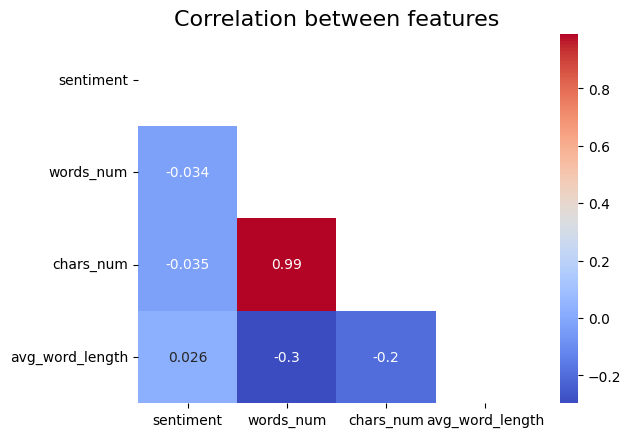

In [30]:
# plot features correlations
corr= sent_df.corr(numeric_only= True)
# use mask to avoid information duplicates 
mask= np.triu(np.ones_like(corr, dtype= 'bool'))

# plot the correlations
sns.heatmap(corr, annot= True, mask=mask, cmap= 'coolwarm')
# Set a title
plt.title("Correlation between features", size= 16)
plt.show()

sentiment,-1,0,1
avg_word_length,4.20,4.14,4.20
words_num,60.87,64.22,59.47
chars_num,313.60,327.43,305.08


Text(0.5, 1.0, 'average words length distribution by sentiment values')

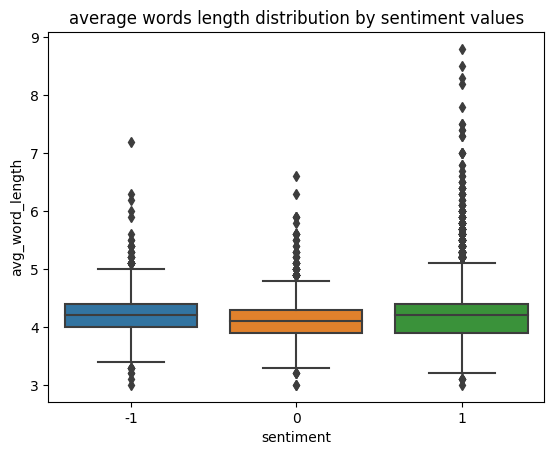

In [31]:
# Show features mean values by positive categories
display(sent_df.groupby('sentiment').agg({'avg_word_length': 'mean', 
                                "words_num": "mean", 
                                "chars_num": "mean"}).round(2).T)
# Plot average words length distribution in each positive value
sns.boxplot(data= sent_df, x="sentiment", y= "avg_word_length")
plt.title('average words length distribution by sentiment values')

* As we saw above in the summary table, positive and negative polarity both have the same average word length but the number of words and characters in neutral is the highest. Therefor we can say that no correlation between polarity and number of words.
* We also see in the plot that only positive sentiment has average words length more than 7 characters but we can't say that there is a significant correlation because our data is imblance.

In [32]:
# Show sent_df numeric features describtive summary
sent_df.describe(percentiles=[0.5]).round(2)

,sentiment,words_num,chars_num,avg_word_length
count,22628.00,22628.00,22628.00,22628.00
mean,0.67,60.21,308.76,4.20
std,0.66,28.53,143.93,0.39
min,-1.00,2.00,9.00,3.00
50%,1.00,59.00,302.00,4.20
max,1.00,115.00,508.00,8.80


### Most frequent words in each sentiment reviews..

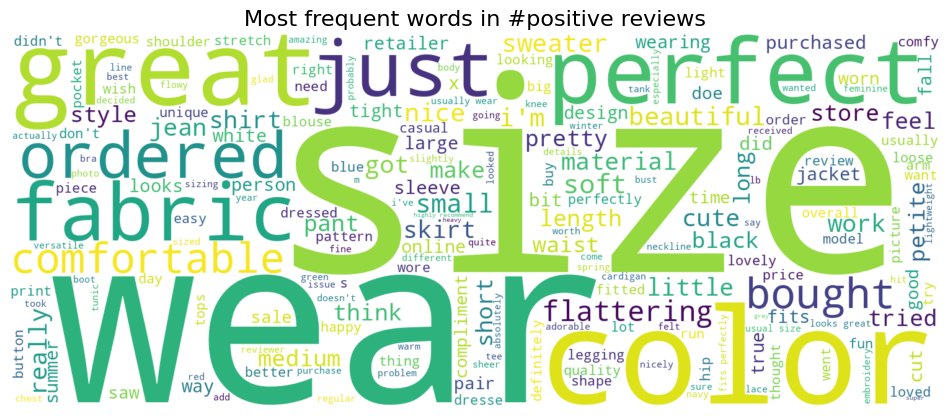

--------------------------------------------------


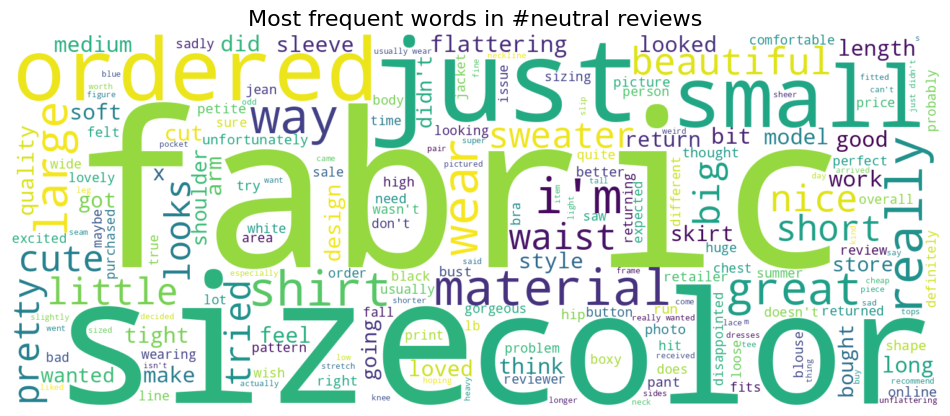

--------------------------------------------------


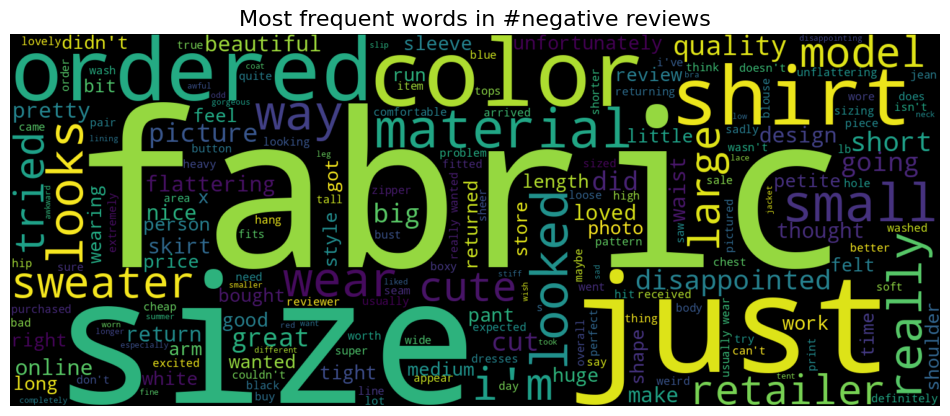

--------------------------------------------------


In [33]:
# separete each sentiment reviews alone
positive= " ".join(sent_df[sent_df['sentiment']==1]["Review Text"].str.lower())
neutral= " ".join(sent_df[sent_df['sentiment']==0]["Review Text"].str.lower())
negative= " ".join(sent_df[sent_df['sentiment']==-1]["Review Text"].str.lower())

# plot most frequently words in each sentiment reviews
plot_words(positive, "#positive", "white")
plot_words(neutral, "#neutral", "white")
plot_words(negative, "#negative")

* With a quick glance at the previous charts, you can infer which words have a strong relation with each sentiment. I encourage you to check them yourself.   

# **Conclusion**
This analysis delved into customer sentiment and product performance within the clothing store dataset, addressing key questions about product ratings, word usage, and review length. Here's a summary of key findings and actionable recommendations:

- **Product Standouts**:

    * **Top performers**: Layering, Jeans, Lounge, Sleep, and Jackets emerged as customer favorites with above-average ratings (4.3+), indicating high satisfaction.
    * **Trend department needs attention**: It consistently received the lowest ratings, highlighting areas for improvement to match customer expectations.
* **Sentiment Analysis**:

    * **Positive bias**: As mentioned earlier, the data leans heavily towards positive reviews (77%), potentially skewing some interpretations.
    * **Customer Voice**: "Wearing" emerged as a key word in positive reviews, emphasizing the importance of comfortable wearability. Leverage this in marketing and product descriptions.
    * **Negative review engagement**: Although less frequent, negative reviews garnered more supporters, pointing towards potential areas for addressing customer concerns.
* **Demographics and Engagement**:
    * **Teen underrepresentation**: The lack of reviews from teens (only 4 out of 23,000) highlights the need for strategies to attract and engage this important demographic.
    * **Balanced Age Group Ratings**: All age categories show similar average ratings, with middle adulthood contributing the most reviews.
* **Actionable Recommendations**:
    * **Prioritize Product Quality**: Consistent sizing, accurate colors, and comfortable fabrics resonate with customers. Emphasize these aspects, ensure quality control, and gather feedback on fit and wearability.
    * **Target Teen Demographic**: Develop targeted marketing campaigns and product offerings that cater to teen preferences and address their specific needs within relevant clothing categories.
    * **Analyze "Normal" Products**: The identified 89 products require closer examination to understand potential issues and opportunities for improvement. Conduct deeper analysis and gather additional customer feedback to inform actionable steps.
    * **Evaluate "Bad" Products**: The 68 identified products with consistently low ratings necessitate review for removal or significant improvement. Analyze negative reviews to pinpoint specific issues and explore potential solutions before making decisions.
    * **Address Customer Concerns**: Actively respond to feedback and prioritize addressing issues raised in negative reviews, particularly those with high supporter counts. Demonstrate a commitment to improvement.